# **CS20B1044 Pattern Recognition Assignment 2**

### Done using inbuilt functions from numpy and sympy

In [638]:
# This assignment is done by CS20B1044 Avinash R Changrani

# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

**Q1. Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2).**

       ω1 = [1,6; 3,4; 3,8; 5,6] ω2 = [3,0; 1,-2;3,-4;5,-2]

In [639]:
w1 = np.array([[1, 6], [3, 4], [3, 8], [5, 6]])
w2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])

# calculating the mean of the two classes
mean1 = np.mean(w1, axis=0)
mean2 = np.mean(w2, axis=0)

print("Mean: \n", mean1, mean2)

# caluclate the variance of 2 features using mean of the two classes
var1 = np.sum((w1 - mean1)**2, axis=0) / (w1.shape[0] - 1)
var2 = np.sum((w2 - mean2)**2, axis=0) / (w2.shape[0] - 1)

print("\nVariance: \n", var1, var2)

# calculating the covariance matrix of the two classes
cov1 = np.cov(w1.T)
cov2 = np.cov(w2.T)

print("\nCovariance Matrix for the 2 Classes: ")
print(cov1)
print(cov2)

Mean: 
 [3. 6.] [ 3. -2.]

Variance: 
 [2.66666667 2.66666667] [2.66666667 2.66666667]

Covariance Matrix for the 2 Classes: 
[[2.66666667 0.        ]
 [0.         2.66666667]]
[[2.66666667 0.        ]
 [0.         2.66666667]]


The Gaussian Discriminant Function for the Normal Density is given as:
$$g_i(x) = - \frac{1}{2}(x-μ_i)^TΣ^{-1}(x-μ_i) -\frac{d}{2}ln|2\pi| -\frac{1}{2}ln|Σ_i| + lnP(ω_i)$$

As the covariance matrix is same for both the classes, we can use the same covariance matrix for both the classes and the variance for each feature is equal  to the diagonal elements of the covariance matrix.

Since both |Σi| and the (d/2) ln 2π term in the above are independent of i, they can be ignored as superfluous
additive constants

$$g_i(x) = - \frac{1}{2}(x-μ_i)^TΣ^{-1}(x-μ_i) + lnP(ω_i)$$


We follow the 1st Case ($\Sigma_i = \sigma^2I$) of the Discriminant Functions for the Normal Density which is given as:

$$  g_i(x) = - \frac{\|(x - μ_i)\|^2}{2\sigma^2} + lnP(ω_i) $$

For the decision boundary, we need to find the value of $x$ such that $g_1(x) = g_2(x)$

$$  g_1(x) = g_2(x)  = - \frac{(\|x - μ_1)\|^2}{2\sigma^2} + lnP(ω_1) = - \frac{\|(x - μ_2)\|^2}{2\sigma^2} + lnP(ω_2)$$

$$  \frac{\|(x - μ_1)\|^2}{2\sigma^2} = \frac{\|(x - μ_2)\|^2}{2\sigma^2}  $$

Here, X is the feature vector (x,y) and μ1 and μ2 are the mean vectors of the two classes. We can find the mean vectors by taking the mean of the x and y coordinates of the two classes.

$$  \frac{\|(x,y) - (x_{μ_1}, y_{μ_1}))\|^2}{2\sigma^2} = \frac{\|(x,y) - (x_{μ_2}, y_{μ_2})\|^2}{2\sigma^2}  $$

$$ (x - x_{μ_1})^2 + (y - y_{μ_1})^2 = (x - x_{μ_2})^2 + (y - y_{μ_2})^2  $$

Here, $(x_{μ_1}, y_{μ_1}) = (3,6)$ and $(x_{μ_2}, y_{μ_2}) = (3,-2)$, substituting these values in the above equation we get:

$$ (x - 3)^2 + (y - 6)^2 = (x - 3)^2 + (y + 2)^2  $$

$$ y^2 - 12y + 36 = y^2 + 4y + 4  $$

$$ 16y = 32  $$

$$ y = 2  $$


Inverse of the Covariance Matrix for the 2 Classes: 
[[0.375 0.   ]
 [0.    0.375]]
[[0.375 0.   ]
 [0.    0.375]]
Matrix([[1296.0*(0.25*(0.333333333333333*x - 1)**2 + (0.166666666666667*y - 1)**2)**2 - 81.0*((0.333333333333333*x - 1)**2 + 0.444444444444444*(0.5*y + 1)**2)**2]])

Decision Boundary: 
[(2.00000000000000,), (2.0 - 5.0*sqrt(-0.04*x**2 + 0.24*x - 1),), (5.0*sqrt(-0.04*x**2 + 0.24*x - 1) + 2.0,)]


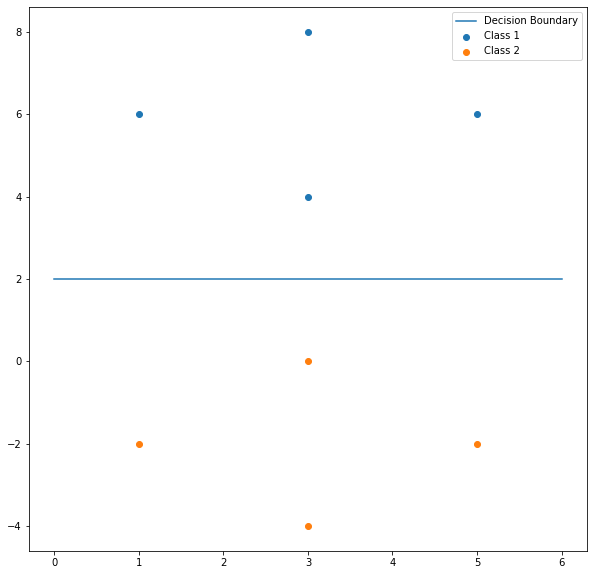

In [640]:
# calculating the inverse of the covariance matrix

inv_cov1 = np.linalg.inv(cov1)
inv_cov2 = np.linalg.inv(cov2)

print("\nInverse of the Covariance Matrix for the 2 Classes: ")
print(inv_cov1)
print(inv_cov2)

# plotting the decision boundary using sympy and solving the discriminant function g1(x) = g2(x)
x, y = sp.symbols('x y')
g1 = sp.Matrix([x, y]) - sp.Matrix(mean1)
g2 = sp.Matrix([x, y]) - sp.Matrix(mean2)

g1 = (g1.T * g1)**2
g2 = (g2.T * g2)**2

# simplifying the discriminant function and solve for y
eq = sp.simplify(g1-g2)
print(eq)
eq = sp.solve(eq, y)

print("\nDecision Boundary: ")
print(eq)

# plotting the decision boundary using the equation
x = np.linspace(0, 6, 100)
y = 2*np.ones(100)

plt.figure(figsize=(10, 10))
plt.plot(x, y, label='Decision Boundary')
plt.scatter(w1[:, 0], w1[:, 1], label='Class 1')
plt.scatter(w2[:, 0], w2[:, 1], label='Class 2')
plt.legend()
plt.show()

**Q2. Find and plot the decision boundarx_2 between class ω1 and ω2. Assume P(ω1) =0.3; P(ω2)=0.7**

      ω1 = [1,-1; 2,-5; 3,-6; 4,-10; 5,-12; 6,-15] ω2 = [-1,1; -2,5; -3,6; -4,10, -5,12; -6, 15]


In [641]:
w1 = np.array([[1,-1],[2,-5], [3,-6], [4,-10], [5,-12], [6,-15]])
w2 = np.array([[-1,1],[-2,5], [-3,6], [-4,10], [-5,12], [-6,15]])

# calculating the mean of the two classes
mean1 = np.mean(w1, axis=0)
mean2 = np.mean(w2, axis=0)

print("Mean: \n", mean1, mean2)

# caluclate the variance of 2 features using mean of the two classes
var1 = np.sum((w1 - mean1)**2, axis=0) / (w1.shape[0] - 1)
var2 = np.sum((w2 - mean2)**2, axis=0) / (w2.shape[0] - 1)

print("\nVariance: \n", var1, var2)

# calculating the covariance matrix of the two classes
cov1 = np.cov(w1.T)
cov2 = np.cov(w2.T)

print("\nCovariance Matrix for the 2 Classes: ")
print(cov1)
print(cov2)

Mean: 
 [ 3.5        -8.16666667] [-3.5         8.16666667]

Variance: 
 [ 3.5        26.16666667] [ 3.5        26.16666667]

Covariance Matrix for the 2 Classes: 
[[ 3.5        -9.5       ]
 [-9.5        26.16666667]]
[[ 3.5        -9.5       ]
 [-9.5        26.16666667]]


The Gaussian Discriminant Function for the Normal Density is given as:
$$g_i(x) = - \frac{1}{2}(x-μ_i)^TΣ^{-1}(x-μ_i) -\frac{d}{2}ln|2\pi| -\frac{1}{2}ln|Σ_i| + lnP(ω_i)$$

As, we can see that the covariance matrix is same for both the classes, we can use the same covariance matrix for both the classes,

Since both |Σi| and the (d/2) ln 2π term in the above are independent of i, they can be ignored as superfluous
additive constants.

$$g_i(x) = - \frac{1}{2}(x-μ_i)^TΣ^{-1}(x-μ_i) + lnP(ω_i)$$

It follows the 2nd Case ($\Sigma_i = \Sigma$) of the Discriminant Functions for the Normal Density which is given as:

$$g_i(x) = w^t_{i}x + w_{i0},$$
    
where $w_i = Σ^{−1}μ_i$ is the vector of weights and $w_{i0} = −\frac{1}{2}μ^t_iΣ^{−1}μ_i + ln P(ω_i)$ is the bias term.

For the decision boundary, we need to find the value of $x$ such that $g_1(x) = g_2(x),$

$$ \rightarrow g_1(x) = g_2(x)  = w^t_{1}x + w_{10} = w^t_{2}x + w_{20}$$

$$  w^t(x − x_0) = 0$$

where $w = Σ^{-1}(μ_i− μ_j)$ and $x_0 = \frac{1}{2}(μ_i + μ_j) - \dfrac{ln [\frac{P(ω_i)}{P(ω_j)}]}{(μ_i− μ_j)^tΣ^{-1}(μ_i− μ_j)}(μ_i - μ_j)$

Here, X is the feature vector (x,y) and μ1 and μ2 are the mean vectors of the two classes. We can find the mean vectors by taking the mean of the x and y coordinates of the two classes.

Here, $μ_i = (3.5,-8.16666667)$ and $μ_j = (-3.5,8.16666667)$, $P(ω_1) =0.3,P(ω_2)=0.7$ and $\Sigma = \begin{bmatrix} 3.5 & -9.5 \\ -9.5 & 26.16666667 \end{bmatrix}$

$μ_i - μ_j = (7, -16.33333333)$ and $μ_i + μ_j = (0, 0)$

$$ Σ^{-1} = \frac{1}{|Σ|} adj(Σ) $$

$$ |Σ| = 3.5*26.16666667 - (-9.5)*(-9.5) = 91.583333345 - 90.25 = 1.333333345$$

$$ adj(Σ) = \begin{bmatrix} 26.16666667 & 9.5 \\ 9.5 & 3.5 \end{bmatrix}$$

$$ Σ^{-1} = \frac{1}{1.333333345} \begin{bmatrix} 26.16666667 & 9.5 \\ 9.5 & 3.5 \end{bmatrix} = \begin{bmatrix} 19.625 & 7.125\\ 7.125 & 2.625 \end{bmatrix}$$
<br />

$$ w = Σ^{-1}(μ_i− μ_j) = \begin{bmatrix} 19.625 & 7.125\\ 7.125 & 2.625 \end{bmatrix} \begin{bmatrix} 7 \\ -16.33333333 \end{bmatrix} = \begin{bmatrix} 21 \\ 7 \end{bmatrix}$$

$$ w^t = \begin{bmatrix} 21 & 7 \end{bmatrix}$$

<br />


$$ x_0 = \frac{1}{2}(μ_i + μ_j) - \dfrac{ln [\frac{P(ω_i)}{P(ω_j)}]}{(μ_i− μ_j)^tΣ^{-1}(μ_i− μ_j)}(μ_i - μ_j)$$

As $μ_i + μ_j = (0, 0)$, we can ignore the first term.

$$ x_0 = - \dfrac{ln [\frac{P(ω_i)}{P(ω_j)}]}{(μ_i− μ_j)^tΣ^{-1}(μ_i− μ_j)}(μ_i - μ_j)$$

$$ (μ_i− μ_j)^tΣ^{-1}(μ_i− μ_j) = \begin{bmatrix}7 & -16.33333333\end{bmatrix} \begin{bmatrix} 19.625 & 7.125\\ 7.125 & 2.625 \end{bmatrix} \begin{bmatrix} 7 \\ -16.33333333 \end{bmatrix} $$

$$ = \begin{bmatrix}7 & -16.33333333\end{bmatrix}*\begin{bmatrix} 21 \\ 7 \end{bmatrix} = 21*7 + 7*(-16.33333333) = 32.66666666$$

$$ ln \left[ \frac{P(ω_i)}{P(ω_j)} \right] = ln \left[\frac{0.3}{0.7}\right] = ln(0.4285714285714286) = -0.84729786038 \approx -0.847$$

$$ x_0 = - \dfrac{-0.847}{32.66666666} \begin{bmatrix}7 \\ -16.33333333 \end{bmatrix} = 0.026 * \begin{bmatrix}7 \\ -16.33333333 \end{bmatrix} = \begin{bmatrix}0.182 \\ -0.425\end{bmatrix}$$

$$ w^t(x − x_0) = 0$$

$$ \begin{bmatrix} 21 & 7 \end{bmatrix}*(x - \begin{bmatrix}0.182 \\ 0.425\end{bmatrix}) = 0$$

Here x is the feature vector (x,y) and we need to find the value of x such that the above equation is satisfied.

$$ \begin{bmatrix} 21 & 7 \end{bmatrix}*\left(\begin{bmatrix} x \\ y \end{bmatrix} - \begin{bmatrix}0.182 \\ 0.5\end{bmatrix}\right) = \begin{bmatrix} 21 & 7 \end{bmatrix} * \begin{bmatrix}x-0.182 \\ y-0.425\end{bmatrix} = 0$$

$$ 21(x-0.182) + 7(y-0.425) = 21x + 7y - 6.797 = 0$$



Inverse of the Covariance Matrix for the 2 Classes: 
[[19.625  7.125]
 [ 7.125  2.625]]
[[19.625  7.125]
 [ 7.125  2.625]]
21.0000000000002*x + 7.00000000000007*y - 0.847297860387204

Decision Boundary: 
[0.121042551483886 - 3.0*x]


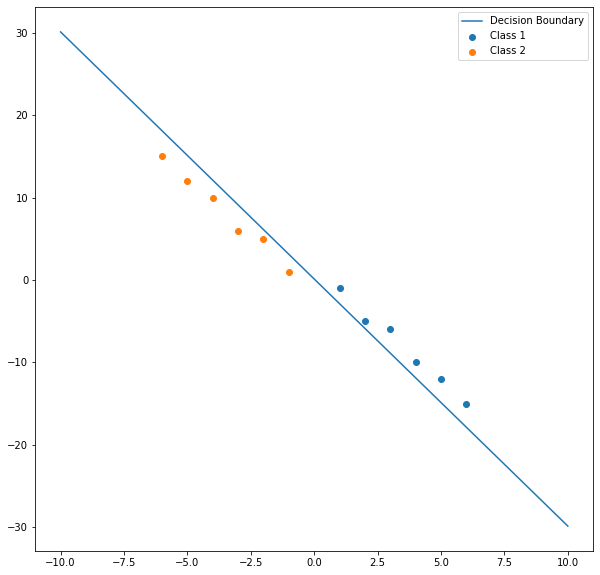

In [642]:
# calculating the inverse of the covariance matrix

inv_cov1 = np.linalg.inv(cov1)
inv_cov2 = np.linalg.inv(cov2)

print("\nInverse of the Covariance Matrix for the 2 Classes: ")
print(inv_cov1)
print(inv_cov2)

# plotting the decision boundary using sympy and solving the discriminant function g1(x) = g2(x)
x, y = sp.symbols('x y')
X = np.array([x, y])
g1 = -0.5*np.matmul(np.matmul((X - mean1).T, inv_cov1), (X - mean1)) + np.log(0.3)
g2 = -0.5*np.matmul(np.matmul((X - mean2).T, inv_cov2), (X - mean2)) + np.log(0.7)


# simplifying the discriminant function and solve for y
eq = sp.simplify(g1-g2)
print(eq)
eq = sp.solve(eq, y)

print("\nDecision Boundary: ")
print(eq)

# plotting the decision boundary using the equation solved using sympy
x = np.linspace(-10, 10, 100)
y = 0.121042551483886 - 3.0*x

plt.figure(figsize=(10, 10))
plt.plot(x, y, label='Decision Boundary')
plt.scatter(w1[:, 0], w1[:, 1], label='Class 1')
plt.scatter(w2[:, 0], w2[:, 1], label='Class 2')
plt.legend()

plt.show()

**Q3. Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2).**

       ω1 = [2,6; 3,4; 3,8; 4,6] ω2 = [3,0; 1,-2; 3,-4; 5,-2]

In [643]:
w1 = np.array([[2, 6], [3, 4], [3, 8], [4, 6]])
w2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])

# calculating the mean of the two classes
mean1 = np.mean(w1, axis=0)
mean2 = np.mean(w2, axis=0)

print("Mean: \n", mean1, mean2)

# caluclate the variance of 2 features using mean of the two classes
var1 = np.sum((w1 - mean1)**2, axis=0) / (w1.shape[0] - 1)
var2 = np.sum((w2 - mean2)**2, axis=0) / (w2.shape[0] - 1)

print("\nVariance: \n", var1, var2)

# calculating the covariance matrix of the two classes
cov1 = np.cov(w1.T)
cov2 = np.cov(w2.T)

print("\nCovariance Matrix for the 2 Classes: ")
print(cov1)
print(cov2)

Mean: 
 [3. 6.] [ 3. -2.]

Variance: 
 [0.66666667 2.66666667] [2.66666667 2.66666667]

Covariance Matrix for the 2 Classes: 
[[0.66666667 0.        ]
 [0.         2.66666667]]
[[2.66666667 0.        ]
 [0.         2.66666667]]


The Gaussian Discriminant Function for the Normal Density is given as:
$$g_i(x) = - \frac{1}{2}(x-μ_i)^TΣ^{-1}(x-μ_i) -\frac{d}{2}ln|2\pi| -\frac{1}{2}ln|Σ_i| + lnP(ω_i)$$

$$Σ_1 = \begin{bmatrix} 0.66666667 & 0 \\ 0 && 2.66666667 \end{bmatrix}, Σ_2 = \begin{bmatrix} 2.66666667 & 0 \\ 0 && 2.66666667 \end{bmatrix}$$

We can see that covariance matrices are not the same for the two classes. So, we cannot use the same discriminant function for both the classes. We need to find the discriminant function for each class separately.

Only the the (d/2) ln 2π term in the above are independent of i. So, we can ignore that term.

It follows the Case 3: Σi = arbitrary of the Discriminant Functions for the Normal Density which is given as:

$$ g_i(x) = x^tW_ix + w^t_ix + w_{i0},$$

where $W_i = -\frac{1}{2}Σ_i^{-1}$, $w_i = Σ_i^{-1}μ_i$ and $w_{i0} = -\frac{1}{2}μ_i^TΣ_i^{-1}μ_i -\frac{1}{2}ln|Σ_i| + lnP(ω_i)$

For class ω1, we have:
$$ μ_1 = \begin{bmatrix} 3 \\ 6 \end{bmatrix}$$
$$Σ_1 = \begin{bmatrix} 0.66666667 & 0 \\ 0 && 2.66666667 \end{bmatrix}, Σ_1^{-1} = \frac{1}{|Σ_1|} adj(Σ_1) $$
$$ Σ_1^{-1} = \frac{1}{1.77777777} \begin{bmatrix} 2.66666667 & 0 \\ 0 & 0.66666667 \end{bmatrix} = \begin{bmatrix} 1.5 & 0 \\ 0 & 0.375 \end{bmatrix}$$

$$ W_1 = -\frac{1}{2}Σ_1^{-1} = -\frac{1}{2} \begin{bmatrix} 1.5 & 0 \\ 0 & 0.375 \end{bmatrix} = \begin{bmatrix} -0.75 & 0 \\ 0 & -0.1875 \end{bmatrix}$$

$$ w_1 = Σ_1^{-1}μ_1 = \begin{bmatrix} 1.5 & 0 \\ 0 & 0.375 \end{bmatrix} \begin{bmatrix} 3 \\ 6 \end{bmatrix} = \begin{bmatrix} 4.5 \\ 2.25 \end{bmatrix}$$

As $P(ω_1) = P(ω_2)$, we can ignore the term $lnP(ω_i)$.

$$ μ_1^TΣ_1^{-1}μ_1 = \begin{bmatrix} 3 & 6 \end{bmatrix} \begin{bmatrix} 1.5 & 0 \\ 0 & 0.375 \end{bmatrix} \begin{bmatrix} 3 \\ 6 \end{bmatrix} =  \begin{bmatrix} 4.5 & 2.25 \end{bmatrix} \begin{bmatrix} 3 \\ 6 \end{bmatrix} = 27 $$

$$ w_{10} = -\frac{1}{2}μ_1^TΣ_1^{-1}μ_1 -\frac{1}{2}ln|Σ_1| = -\frac{1}{2}27 -\frac{1}{2}ln(1.7777777777) = -13.5 -0.28768207243 = -13.7876820724 \approx -13.788$$

$$ g_1(x) = x^tW_1x + w_1^tx + w_{10} = x^t\begin{bmatrix} -0.75 & 0 \\ 0 & -0.1875 \end{bmatrix}x + \begin{bmatrix} 4.5 \\ 2.25 \end{bmatrix}^tx + (-13.788)$$


For class ω2, we have:
$$ μ_2 = \begin{bmatrix} 3 \\ -2 \end{bmatrix}$$
$$Σ_2 = \begin{bmatrix} 2.66666667 & 0 \\ 0 && 2.66666667 \end{bmatrix}, Σ_2^{-1} = \frac{1}{|Σ_2|} adj(Σ_2) $$

$$ Σ_2^{-1} = \frac{1}{7.11111111} \begin{bmatrix} 2.66666667 & 0 \\ 0 & 2.66666667 \end{bmatrix} = \begin{bmatrix} 0.375 & 0 \\ 0 & 0.375 \end{bmatrix}$$

$$ W_2 = -\frac{1}{2}Σ_2^{-1} = -\frac{1}{2} \begin{bmatrix} 0.375 & 0 \\ 0 & 0.375 \end{bmatrix} = \begin{bmatrix} -0.1875 & 0 \\ 0 & -0.1875 \end{bmatrix}$$

$$ w_2 = Σ_2^{-1}μ_2 = \begin{bmatrix} 0.375 & 0 \\ 0 & 0.375 \end{bmatrix} \begin{bmatrix} 3 \\ -2 \end{bmatrix} = \begin{bmatrix} 1.125 \\ -0.75 \end{bmatrix}$$

As $P(ω_1) = P(ω_2)$, we can ignore the term $lnP(ω_i)$.

$$ μ_2^TΣ_2^{-1}μ_2 = \begin{bmatrix} 3 & -2 \end{bmatrix} \begin{bmatrix} 0.375 & 0 \\ 0 & 0.375 \end{bmatrix} \begin{bmatrix} 3 \\ -2 \end{bmatrix} = \begin{bmatrix} 1.125 & -0.75 \end{bmatrix} \begin{bmatrix} 3 \\ -2 \end{bmatrix} = 4.875 $$

$$ w_{20} = -\frac{1}{2}μ_2^TΣ_2^{-1}μ_2 -\frac{1}{2}ln|Σ_2| = -\frac{1}{2}4.875 -\frac{1}{2}ln(7.1111111111) = -2.4375 -0.98082925301 = -3.41832925301 \approx -3.418$$

$$ g_2(x) = x^tW_2x + w_2^tx + w_{20} = x^t\begin{bmatrix} -0.1875 & 0 \\ 0 & -0.1875 \end{bmatrix}x + \begin{bmatrix} 1.125 \\ -0.75 \end{bmatrix}^tx + (-3.418)$$

Now, to get the decision boundary, we need to find the points where $g_1(x) = g_2(x)$ and then solving for x.

Here x is $ \begin{bmatrix} x \\ y \end{bmatrix} $

$$ g_1(x) - g_2(x) = 0 $$


$$ x^t\begin{bmatrix} -0.75 & 0 \\ 0 & -0.1875 \end{bmatrix}x + \begin{bmatrix} 4.5 \\ 2.25 \end{bmatrix}^tx + (-13.788) - x^t\begin{bmatrix} -0.1875 & 0 \\ 0 & -0.1875 \end{bmatrix}x - \begin{bmatrix} 1.125 \\ -0.75 \end{bmatrix}^tx - (-3.418) = 0 $$

$ \begin{bmatrix} x && y \end{bmatrix}\begin{bmatrix} -0.75 & 0 \\ 0 & -0.1875 \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} 4.5 && 2.25 \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} + (-13.788) - \begin{bmatrix} x && y \end{bmatrix}\begin{bmatrix} -0.1875 & 0 \\ 0 & -0.1875 \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} - \begin{bmatrix} 1.125 && -0.75 \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} - (-3.418) = 0 $


$$ \begin{bmatrix} -0.75x && -0.1875y \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} + 4.5x + 2.25y + (-13.788) - \begin{bmatrix} -0.1875x && -0.1875y \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} - 1.125x + 0.75y - (-3.418) = 0 $$

$$ -0.75x^2 - 0.1875y^2 + 4.5x + 2.25y + (-13.788) + 0.1875x^2 + 0.1875y^2 - 1.125x + 0.75y - (-3.418) = 0 $$

$$ -0.5625x^2 + 3.375x + 3y -10.37 = 0 $$

$$ y = \frac{ 0.5625x^2 - 3.375x + 10.37}{3} $$



Inverse of the Covariance Matrix for the 2 Classes: 
[[1.5   0.   ]
 [0.    0.375]]
[[0.375 0.   ]
 [0.    0.375]]
-0.5625*x**2 + 3.375*x + 3.0*y - 10.3693528194401

Decision Boundary: 
[0.1875*x**2 - 1.125*x + 3.45645093981337]


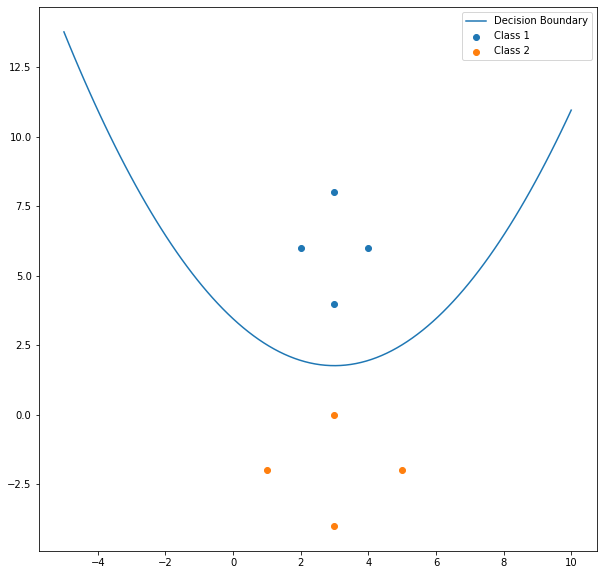

In [644]:
# calculating the inverse of the covariance matrix

inv_cov1 = np.linalg.inv(cov1)
inv_cov2 = np.linalg.inv(cov2)

print("\nInverse of the Covariance Matrix for the 2 Classes: ")
print(inv_cov1)
print(inv_cov2)

# plotting the decision boundary using sympy and solving the discriminant function g1(x) = g2(x)
x, y = sp.symbols('x y')
X = np.array([x, y])
g1 = -0.5*np.matmul(np.matmul((X - mean1).T, inv_cov1), (X - mean1)) - 0.5*np.log(np.linalg.det(cov1))
g2 = -0.5*np.matmul(np.matmul((X - mean2).T, inv_cov2), (X - mean2)) - 0.5*np.log(np.linalg.det(cov2))

# simplifying the discriminant function and solve for y
eq = sp.simplify(g1-g2)
print(eq)
eq = sp.solve(eq, y)

print("\nDecision Boundary: ")
print(eq)

# plotting the decision boundary using the equation solved using sympy
x = np.linspace(-5, 10, 100)
y = 0.1875*x**2 - 1.125*x + 3.45645093981337

plt.figure(figsize=(10, 10))
plt.plot(x, y, label='Decision Boundary')
plt.scatter(w1[:, 0], w1[:, 1], label='Class 1')
plt.scatter(w2[:, 0], w2[:, 1], label='Class 2')
plt.legend()

plt.show()


<b>Q4. Implement Bayes Classifier for Iris Dataset. \
Dataset Specifications: \
Total number of samples = 150 \
Number of classes = 3 (Iris setosa, Iris virginica, and Iris versicolor) \
Number of samples in each class = 50 

Use the following information to design classifier: \
Number of training feature vectors ( first 40 in each class) = 40 \
Number of test feature vectors ( remaining 10 in each class) = 10 \
Number of dimensions = 4 \
Feature vector = <sepal length, sepal width, petal length, petal width> 

If the samples follow a multivariate normal density, find the accuracy of classification for the test feature vectors.</b>

<ins>Design of Bayes Classifier</ins> \
Given, \
    Iris dataset \
    X = <$x_1, x_2, x_3, x_4$> \
    Number of classes= ω_1,ω_2,ω_3 ; c=3 \
N=120; $n(ω_1)=n(ω_2)=n(ω_3)=40$ \
Bayes Rule: \
    Find $ P(ω_i|X) = \frac{P(X|ω_i)P(ω_i)}{P(X)} $
    P(X) is a constant for all classes; so it can be ignored.

Steps to follow in Iris Classification:
1. Find apriori probability P(ω_i) = $\frac{n(ω_i)}{N} = \frac{40}{120} = \frac{1}{3}$
2. Find $P(X|ω_i)$ it’s multivariate class, by following normal density 
$$P(X|ω_i) = \frac{1}{(2\pi)^{d/2}|Σ_i|^{1/2}} e^{ \left[- \frac{1}{2}(x-μ_i)^TΣ^{-1}(x-μ_i)\right]}$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 a. Find the mean vector \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 b. Find the covariance matrix, \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 c. Find the |Σ_i| and |Σ_i|^-1 

3. Find $P(ω_1|X), P(ω_2|X), P(ω_3|X)$ Find the maximum and assign to that class. \
Also, plot the accuracy for : \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i) Separate classes \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii) Overall performance  

4. Find the discriminant function and draw the decision surface between the classes

In [645]:
df = pd.read_csv("./Iris.csv")

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [646]:
# get the class labels
labels = df['Species'].unique()

# encode the class labels
df['Class'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [647]:
# dropping the ID  column
df = df.drop(['Id'], axis=1)

# train test split of the data
# 40 of each class is taken for training and 10 for testing 
train = pd.concat([df.iloc[:40, :], df.iloc[50:90, :], df.iloc[100:140, :]] )
train.reset_index(drop=True, inplace=True)

test = pd.concat([df.iloc[40:50, :], df.iloc[90:100, :], df.iloc[140:150, :]] )
test.reset_index(drop=True, inplace=True)

# display the train and test data head side by side using ipython display
from IPython.display import display
display(train.head())
display(test.head())


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.0,3.5,1.3,0.3,Iris-setosa,0
1,4.5,2.3,1.3,0.3,Iris-setosa,0
2,4.4,3.2,1.3,0.2,Iris-setosa,0
3,5.0,3.5,1.6,0.6,Iris-setosa,0
4,5.1,3.8,1.9,0.4,Iris-setosa,0


In [648]:
# splitting the data into features and labels in df
X_train = train.iloc[:, :-2]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-2]
y_test = test.iloc[:, -1]

# display the x_train and x_test data head side by side using ipython display

display(X_train[:5])

display(X_test[:5])

# display the y_train and y_test data head side by side using ipython display

display(y_train[:5])

display(y_test[:5])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.0,3.5,1.3,0.3
1,4.5,2.3,1.3,0.3
2,4.4,3.2,1.3,0.2
3,5.0,3.5,1.6,0.6
4,5.1,3.8,1.9,0.4


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [649]:
# combining the train data and splitting it into 3 classes
train = pd.concat([X_train, y_train], axis=1)
train0 = train[train['Class'] == 0]
train1 = train[train['Class'] == 1]
train2 = train[train['Class'] == 2]


1. Find apriori probability $P(ω_i) = \frac{n(ω_i)}{N} = \frac{40}{120} = \frac{1}{3}$

In [650]:
# calculating the apriori probabilities of the classes
p0 = train0.shape[0] / train.shape[0]
p1 = train1.shape[0] / train.shape[0]
p2 = train2.shape[0] / train.shape[0]

# printing the apriori probabilities
print("Apriori Probabilities: ")
print("P(w0) = ", p0)
print("P(w1) = ", p1)
print("P(w2) = ", p2)


Apriori Probabilities: 
P(w0) =  0.3333333333333333
P(w1) =  0.3333333333333333
P(w2) =  0.3333333333333333


2 a. Find the mean vector \
2 b. Find the covariance matrix, \
2 c. Find the |Σ_i| and |Σ_i|^-1 

In [651]:
# calculating the mean of the three classes
mean0 = np.mean(train0.iloc[:, :-1], axis=0)
mean1 = np.mean(train1.iloc[:, :-1], axis=0)
mean2 = np.mean(train2.iloc[:, :-1], axis=0)

# print the mean of the three classes

print("Mean of the 1st class: \n", mean0)
print("Mean of the 2nd class: \n", mean1)
print("Mean of the 3rd class: \n", mean2)

Mean of the 1st class: 
 SepalLengthCm    5.0375
SepalWidthCm     3.4400
PetalLengthCm    1.4625
PetalWidthCm     0.2325
dtype: float64
Mean of the 2nd class: 
 SepalLengthCm    6.0100
SepalWidthCm     2.7800
PetalLengthCm    4.3175
PetalWidthCm     1.3500
dtype: float64
Mean of the 3rd class: 
 SepalLengthCm    6.6225
SepalWidthCm     2.9600
PetalLengthCm    5.6075
PetalWidthCm     1.9900
dtype: float64


In [652]:
# calculating the covariance matrix of the three classes
cov0 = np.cov(train0.iloc[:, :-1].T)
cov1 = np.cov(train1.iloc[:, :-1].T)
cov2 = np.cov(train2.iloc[:, :-1].T)

# print the covariance matrix of the three classes
print("Covariance matrix of the 1st class: \n", cov0)
print("Covariance matrix of the 2nd class: \n", cov1)
print("Covariance matrix of the 3rd class: \n", cov2)

# calculating the inverse of the covariance matrix of the three classes
inv_cov0 = np.linalg.inv(cov0)
inv_cov1 = np.linalg.inv(cov1)
inv_cov2 = np.linalg.inv(cov2)

# print the inverse of the covariance matrix of the three classes
print("Inverse of the covariance matrix of the 1st class: \n", inv_cov0)
print("Inverse of the covariance matrix of the 2nd class: \n", inv_cov1)
print("Inverse of the covariance matrix of the 3rd class: \n", inv_cov2)

Covariance matrix of the 1st class: 
 [[0.13112179 0.09897436 0.01298077 0.01362179]
 [0.09897436 0.13271795 0.00205128 0.0145641 ]
 [0.01298077 0.00205128 0.02958333 0.00458333]
 [0.01362179 0.0145641  0.00458333 0.00994231]]
Covariance matrix of the 2nd class: 
 [[0.27374359 0.08661538 0.17212821 0.05230769]
 [0.08661538 0.11087179 0.08087179 0.04538462]
 [0.17212821 0.08087179 0.20353205 0.07371795]
 [0.05230769 0.04538462 0.07371795 0.04307692]]
Covariance matrix of the 3rd class: 
 [[0.46794231 0.11041026 0.35777564 0.05125641]
 [0.11041026 0.11323077 0.08107692 0.04625641]
 [0.35777564 0.08107692 0.34532692 0.05930769]
 [0.05125641 0.04625641 0.05930769 0.07425641]]
Inverse of the covariance matrix of the 1st class: 
 [[ 18.96620997 -13.74680415  -6.95996886  -2.63963858]
 [-13.74680415  19.00598614   6.57939373 -12.03991503]
 [ -6.95996886   6.57939373  39.21733422 -18.18107202]
 [ -2.63963858 -12.03991503 -18.18107202 130.21494869]]
Inverse of the covariance matrix of the 2nd c

2. Find $P(X|ω_i)$ it’s multivariate class, by following normal density 
$$P(X|ω_i) = \frac{1}{(2\pi)^{d/2}|Σ_i|^{1/2}} e^{ \left[- \frac{1}{2}(x-μ_i)^TΣ^{-1}(x-μ_i)\right]}$$

In [653]:
# We first calculate the constant part of the probability density function (d = 4)

const1 = 1 / (((2 * np.pi)**2) * np.sqrt(np.linalg.det(cov0)))
const2 = 1 / (((2 * np.pi)**2) * np.sqrt(np.linalg.det(cov1)))
const3 = 1 / (((2 * np.pi)**2) * np.sqrt(np.linalg.det(cov2)))

# print the constant part of the probability density function
print("Constant part of the probability density function: ")
print("Constant 1: ", const1)
print("Constant 2: ", const2)
print("Constant 3: ", const3)

Constant part of the probability density function: 
Constant 1:  20.072058757863076
Constant 2:  5.285902444761129
Constant 3:  2.119807789093566


3. Find $P(ω_1|X), P(ω_2|X), P(ω_3|X)$ Find the maximum and assign to that class.

In [654]:
# Now, we calculate the posterior probabilities for each class for each data point in the test set

# creating a list to store the posterior probabilities
posterior = []

# list to store the predicted class
pred = []

# looping through each data point in the test set
for i in range(X_test.shape[0]):
    # calculating the posterior probability for each class
    post0 = const1 * np.exp(-0.5 * np.dot(np.dot((X_test.iloc[i, :] - mean0).T, inv_cov0), (X_test.iloc[i, :] - mean0)))*p0
    post1 = const2 * np.exp(-0.5 * np.dot(np.dot((X_test.iloc[i, :] - mean1).T, inv_cov1), (X_test.iloc[i, :] - mean1)))*p1
    post2 = const3 * np.exp(-0.5 * np.dot(np.dot((X_test.iloc[i, :] - mean2).T, inv_cov2), (X_test.iloc[i, :] - mean2)))*p2
    
    # appending the posterior probabilities to the list
    posterior.append([post0, post1, post2])
    
    # appending the predicted class to the list
    pred.append(np.argmax([post0, post1, post2]))

# converting the class values to class labels
pred_names = [labels[i] for i in pred]

pred_names

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica']

In [655]:
# calculating the accuracy of the model for the test set on the basis of the predicted class labels
acc = np.sum(pred == y_test) / y_test.shape[0]

# printing the accuracy 
print("Accuracy of classification for the test feature vectors: ", acc*100, "%")


Accuracy of classification for the test feature vectors:  100.0 %


**Q5. Use only two features: Petal Length and Petal Width, for 3 class classification and draw the decision boundary between them (2 dimension, 3 regions also called as multi-class problem)**

In [656]:
# drop the class,sepal lenght and sepal width column from the df

df = df.drop(['Species','SepalLengthCm','SepalWidthCm'], axis=1)

df

,PetalLengthCm,PetalWidthCm,Class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [657]:
# splitting the data based on the class

df0 = df[df['Class'] == 0]
df1 = df[df['Class'] == 1]
df2 = df[df['Class'] == 2]

# calculate the mean of the three classes
mean0 = np.mean(df0.iloc[:, :2], axis=0)
mean1 = np.mean(df1.iloc[:, :2], axis=0)
mean2 = np.mean(df2.iloc[:, :2], axis=0)

# print the mean of the three classes
print("Mean of the 1st class: \n", mean0)
print("Mean of the 2nd class: \n", mean1)
print("Mean of the 3rd class: \n", mean2)

# calculate variance of the features of the three classes
var0 = np.var(df0.iloc[:, :2], axis=0)
var1 = np.var(df1.iloc[:, :2], axis=0)
var2 = np.var(df2.iloc[:, :2], axis=0)

# print the variance of the features of the three classes
print("Variance of the 1st class: \n", var0)
print("Variance of the 2nd class: \n", var1)
print("Variance of the 3rd class: \n", var2)

# calculate the covariance matrix of the three classes
cov0 = np.cov(df0.iloc[:, :2].T)
cov1 = np.cov(df1.iloc[:, :2].T)
cov2 = np.cov(df2.iloc[:, :2].T)

# print the covariance matrix of the three classes
print("Covariance matrix of the 1st class: \n", cov0)
print("Covariance matrix of the 2nd class: \n", cov1)
print("Covariance matrix of the 3rd class: \n", cov2)

Mean of the 1st class: 
 PetalLengthCm    1.464
PetalWidthCm     0.244
dtype: float64
Mean of the 2nd class: 
 PetalLengthCm    4.260
PetalWidthCm     1.326
dtype: float64
Mean of the 3rd class: 
 PetalLengthCm    5.552
PetalWidthCm     2.026
dtype: float64
Variance of the 1st class: 
 PetalLengthCm    0.029504
PetalWidthCm     0.011264
dtype: float64
Variance of the 2nd class: 
 PetalLengthCm    0.216400
PetalWidthCm     0.038324
dtype: float64
Variance of the 3rd class: 
 PetalLengthCm    0.298496
PetalWidthCm     0.073924
dtype: float64
Covariance matrix of the 1st class: 
 [[0.03010612 0.00569796]
 [0.00569796 0.01149388]]
Covariance matrix of the 2nd class: 
 [[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
Covariance matrix of the 3rd class: 
 [[0.30458776 0.04882449]
 [0.04882449 0.07543265]]


As, we can see that the covariance matrix is not same for all the classes, so we can’t use the same discriminant function for all the classes. So, we need to find the discriminant function for each class. 
The Gaussian Discriminant Function for the Normal Density is given as:
$$g_i(x) = - \frac{1}{2}(x-μ_i)^TΣ^{-1}(x-μ_i) -\frac{d}{2}ln|2\pi| -\frac{1}{2}ln|Σ_i| + lnP(ω_i)$$

Only the the (d/2) ln 2π term in the above are independent of i. So, we can ignore that term.

It follows the Case 3: Σi = arbitrary of the Discriminant Functions for the Normal Density which is given as:

$$ g_i(x) = x^tW_ix + w^t_ix + w_{i0},$$

where $W_i = -\frac{1}{2}Σ_i^{-1}$, $w_i = Σ_i^{-1}μ_i$ and $w_{i0} = -\frac{1}{2}μ_i^TΣ_i^{-1}μ_i -\frac{1}{2}ln|Σ_i| + lnP(ω_i)$

As $P(ω_i) = \frac{n(ω_i)}{N} = \frac{40}{120} = \frac{1}{3}$ is same for all the classes, we can ignore the term $lnP(ω_i)$.

For class $ω_1$, we have:
$$ μ_1 = \begin{bmatrix}  1.464 \\ 0.244 \end{bmatrix}$$

$$Σ_1 = \begin{bmatrix} 0.0301 & 0.0057 \\ 0.0057 & 0.0115 \end{bmatrix}, Σ_1^{-1} = \frac{1}{|Σ_1|} adj(Σ_1)$$

$$ Σ_1^{-1} = \begin{bmatrix}  36.664 & -18.172 \\ -18.172 & 95.963 \end{bmatrix}$$

$$ W_1 = -\frac{1}{2}Σ_1^{-1} = \begin{bmatrix} -18.332 & 9.086 \\ 9.086 & -47.981 \end{bmatrix}$$

$$ w_1 = Σ_1^{-1}μ_1 = \begin{bmatrix}  36.664 & -18.172 \\ -18.172 & 95.963 \end{bmatrix}\begin{bmatrix}  1.464 \\ 0.244 \end{bmatrix} = \begin{bmatrix} 49.24 \\ -3.19 \end{bmatrix}$$

$$ w_{10} = -\frac{1}{2}μ_1^TΣ_1^{-1}μ_1 -\frac{1}{2}ln|Σ_1| = -\frac{1}{2}\begin{bmatrix}  1.464 \\ 0.244 \end{bmatrix}^T\begin{bmatrix}  36.664 & -18.172 \\ -18.172 & 95.963 \end{bmatrix}\begin{bmatrix}  1.464 \\ 0.244 \end{bmatrix} -\frac{1}{2}ln(|Σ_1|) $$

$$ w_{10} = -\frac{1}{2}\begin{bmatrix}  1.464 & 0.244 \end{bmatrix}\begin{bmatrix}  36.664 & -18.172 \\ -18.172 & 95.963 \end{bmatrix}\begin{bmatrix}  1.464 \\ 0.244 \end{bmatrix} -\frac{1}{2}ln(0.00031) $$

$$ w_{10} = -\frac{1}{2}\begin{bmatrix}  1.464 & 0.244 \end{bmatrix}\begin{bmatrix}  49.24 \\ -3.19 \end{bmatrix} -\frac{1}{2}ln(0.00031) $$

$$ w_{10} = -\frac{71.31}{2} -\frac{-8.079}{2} = -31.6155$$

$$ g_1(x) = x^tW_1x + w^t_1x + w_{10}$$

$$ g_1(x) = \begin{bmatrix}  x_1 & x_2 \end{bmatrix}\begin{bmatrix}  -18.332 & 9.086 \\ 9.086 & -47.981 \end{bmatrix}\begin{bmatrix}  x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix}  49.24 & -3.19  \end{bmatrix}\begin{bmatrix}  x_1 \\ x_2 \end{bmatrix} - 31.6155$$

$$ g_1(x) = \begin{bmatrix}  x_1 & x_2 \end{bmatrix}\begin{bmatrix}  -18.332x_1 + 9.086x_2 \\ 9.086x_1 - 47.981x_2 \end{bmatrix}  + 49.24x_1 - 3.19x_2 - 31.6155$$

$$ g_1(x) = -18.332x_1^2 + 9.086x_1x_2 + 9.086x_1x_2 - 47.981x_2^2 + 49.24x_1 -3.19x_2 - 31.6155$$

For class $ω_2$, we have:
$$ μ_2 = \begin{bmatrix}  4.26 \\ 1.326 \end{bmatrix}$$

$$Σ_2 = \begin{bmatrix} 0.2208 & 0.0731 \\ 0.0731 & 0.0391 \end{bmatrix}, Σ_2^{-1} = \frac{1}{|Σ_2|} adj(Σ_2)$$

$$ Σ_2^{-1} = \begin{bmatrix}  11.885 & -22.221 \\ -22.221 & 67.12 \end{bmatrix}$$

$$ W_2 = -\frac{1}{2}Σ_2^{-1} = \begin{bmatrix} -5.942 & 11.111 \\ 11.111 & -33.56 \end{bmatrix}$$

$$ w_2 = Σ_2^{-1}μ_2 = \begin{bmatrix}  11.885 & -22.221 \\ -22.221 & 67.12 \end{bmatrix}\begin{bmatrix}  4.26 \\ 1.326 \end{bmatrix} = \begin{bmatrix}  21.16 \\ -5.66 \end{bmatrix}$$

$$ w_{20} = -\frac{1}{2}μ_2^TΣ_2^{-1}μ_2 -\frac{1}{2}ln|Σ_2| = -\frac{1}{2}\begin{bmatrix}  4.26 \\ 1.326 \end{bmatrix}^T\begin{bmatrix}  11.885 & -22.221 \\ -22.221 & 67.12 \end{bmatrix}\begin{bmatrix}  4.26 \\ 1.326 \end{bmatrix} -\frac{1}{2}ln(|Σ_2|) $$

$$ w_{20} = -\frac{1}{2}\begin{bmatrix}  4.26 & 1.326 \end{bmatrix}\begin{bmatrix}  21.16 \\ -5.66 \end{bmatrix} -\frac{1}{2}ln(0.00328) $$

$$ w_{20} = -\frac{82.636}{2} -\frac{-5.72}{2} = -\frac{76.916}{2} = -38.458$$


$$ g_2(x) = x^tW_2x + w^t_2x + w_{20}$$

$$ g_2(x) = \begin{bmatrix}  x_1 & x_2 \end{bmatrix}\begin{bmatrix}  -5.942 & 11.111 \\ 11.111 & -33.56 \end{bmatrix}\begin{bmatrix}  x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix}  21.16 \\ -5.66 \end{bmatrix}\begin{bmatrix}  x_1 \\ x_2 \end{bmatrix} - 38.458$$

$$ g_2(x) = \begin{bmatrix}  x_1 & x_2 \end{bmatrix}\begin{bmatrix}  -5.942x_1 + 11.111x_2 \\ 11.111x_1 - 33.56x_2 \end{bmatrix}  + 21.16x_1 - 5.66x_2 - 38.458$$

$$ g_2(x) = -5.942x_1^2 + 11.111x_1x_2 + 11.111x_1x_2 - 33.56x_2^2 + 21.16x_1 - 5.66x_2 - 38.458$$

For class $ω_3$, we have:

$$ μ_3 = \begin{bmatrix}  5.552 \\ 2.026 \end{bmatrix}$$

$$Σ_3 = \begin{bmatrix} 0.3046 & 0.0488 \\ 0.0488 & 0.0754 \end{bmatrix}, Σ_3^{-1} = \frac{1}{|Σ_3|} adj(Σ_3)$$

$$ Σ_3^{-1} = \begin{bmatrix}  3.662 & -2.37 \\ -2.37 & 14.796 \end{bmatrix}$$

$$ W_3 = -\frac{1}{2}Σ_3^{-1} = \begin{bmatrix} -1.831 & 1.185 \\ 1.185 & -7.398 \end{bmatrix}$$

$$ w_3 = Σ_3^{-1}μ_3 = \begin{bmatrix}  3.662 & -2.37 \\ -2.37 & 14.796 \end{bmatrix}\begin{bmatrix}  5.552 \\ 2.026 \end{bmatrix} = \begin{bmatrix}  15.53 \\ 16.81 \end{bmatrix}$$

$$ w_{30} = -\frac{1}{2}μ_3^TΣ_3^{-1}μ_3 -\frac{1}{2}ln|Σ_3| = -\frac{1}{2}\begin{bmatrix}  5.552 \\ 2.026 \end{bmatrix}^T\begin{bmatrix}  3.662 & -2.37 \\ -2.37 & 14.796 \end{bmatrix}\begin{bmatrix}  5.552 \\ 2.026 \end{bmatrix} -\frac{1}{2}ln(|Σ_3|) $$

$$ w_{30} = -\frac{1}{2}\begin{bmatrix}  5.552 & 2.026 \end{bmatrix}\begin{bmatrix}  15.53 \\ 16.81 \end{bmatrix} -\frac{1}{2}ln( 0.0205) $$

$$ w_{30} = -\frac{120.28}{2} -\frac{-3.8873}{2} = \frac{116.3927}{2} = -58.19635$$


$$ g_3(x) = x^tW_3x + w^t_3x + w_{30}$$

$$ g_3(x) = \begin{bmatrix}  x_1 & x_2 \end{bmatrix}\begin{bmatrix}  -1.831 & 1.185 \\ 1.185 & -7.398 \end{bmatrix}\begin{bmatrix}  x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix}  15.53 \\ 16.81 \end{bmatrix}\begin{bmatrix}  x_1 \\ x_2 \end{bmatrix} - 58.19635$$

$$ g_3(x) = \begin{bmatrix}  x_1 & x_2 \end{bmatrix}\begin{bmatrix}  -1.831x_1 + 1.185x_2 \\ 1.185x_1 - 7.398x_2 \end{bmatrix}  + 15.53x_1 + 16.81x_2 - 58.196358$$

$$ g_3(x) = -1.831x_1^2 + 1.185x_1x_2 + 1.185x_1x_2 - 7.398x_2^2 + 15.53x_1 + 16.81x_2 - 58.19635$$

Now, we find the decision boundary by setting $g_1(x) = g_2(x)$, $g_2(x) = g_3(x)$ and $g_1(x) = g_3(x)$.

$$ g_1(x) = g_2(x)$$

$$ -18.332x_1^2 + 9.086x_1x_2 + 9.086x_1x_2 - 47.981x_2^2 + 49.24x_1 -3.19x_2 - 31.6155 = -5.942x_1^2 + 11.111x_1x_2 + 11.111x_1x_2 - 33.56x_2^2 + 21.16x_1 - 5.66x_2 - 38.458$$

$$ 12.39 x^2 - 4.05 x y + 28.08 x - 14.421 y^2 + 2.47 y + 6.8425 = 0 $$


$$ g_2(x) = g_3(x)$$

$$ -5.942x_1^2 + 11.111x_1x_2 + 11.111x_1x_2 - 33.56x_2^2 + 21.16x_1 - 5.66x_2 - 38.458 = -1.831x_1^2 + 1.185x_1x_2 + 1.185x_1x_2 - 7.398x_2^2 + 15.53x_1 + 16.81x_2 - 58.19635$$

$$ -4.111x^2 + 19.852xy - 26.162y^2 + 5.63x - 22.47y + 19.7384 = 0$$


$$ g_1(x) = g_3(x)$$

$$ -18.332x_1^2 + 9.086x_1x_2 + 9.086x_1x_2 - 47.981x_2^2 + 49.24x_1 -3.19x_2 - 31.6155 = -1.831x_1^2 + 1.185x_1x_2 + 1.185x_1x_2 - 7.398x_2^2 + 15.53x_1 + 16.81x_2 - 58.19635$$

$$ -16.501x^2 + 15.802xy - 40.583y^2 + 33.71x - 20.001y + 26.5814 = 0$$

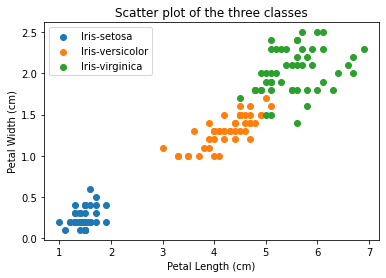

In [658]:
# plot the scatter plot of the three classes
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'], label='Iris-setosa')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], label='Iris-versicolor')
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], label='Iris-virginica')

# set the title and labels of the plot
plt.title('Scatter plot of the three classes')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

plt.show()

Inverse of the covariance matrix of the 1st class: 
 [[ 36.65497822 -18.17128892]
 [-18.17128892  96.0110509 ]]
Inverse of the covariance matrix of the 2nd class: 
 [[ 11.88144095 -22.2102711 ]
 [-22.2102711   67.08965196]]
Inverse of the covariance matrix of the 3rd class: 
 [[ 3.66319625 -2.37103801]
 [-2.37103801 14.79153491]]
-12.3867686330998*x**2 - 4.0389821847981*x*y + 28.0649746448132*x - 14.4606994685009*y**2 + 2.47880583875213*y + 6.85769252899692
-4.10912235213064*x**2 + 19.8392330899636*x*y + 5.62977642079981*x - 26.1490585246696*y**2 - 22.4585230823218*y + 19.73184002801
16.4958909852305*x**2 - 15.8002509051655*x*y - 33.694751065613*x + 40.6097579931706*y**2 + 19.9797172435697*y - 26.5895325570069
Decision boundary between class1 and class2:  [-0.139653762724135*x - 1.38449873376855*sqrt(-0.436697803198121*x**2 + x + 0.251234530609431) + 0.0857083657727485, -0.139653762724135*x + 1.38449873376855*sqrt(-0.436697803198121*x**2 + x + 0.251234530609431) + 0.0857083657727485]
D

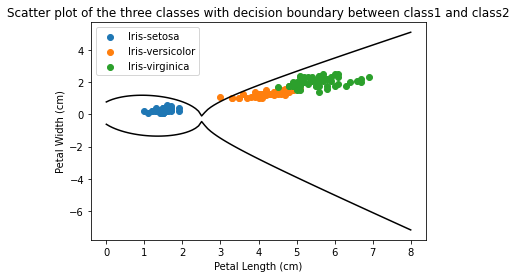

In [659]:
# calulcate the inverse of the covariance matrix of the three classes
inv_cov0 = np.linalg.inv(cov0)
inv_cov1 = np.linalg.inv(cov1)
inv_cov2 = np.linalg.inv(cov2)

# print the inverse of the covariance matrix of the three classes
print("Inverse of the covariance matrix of the 1st class: \n", inv_cov0)
print("Inverse of the covariance matrix of the 2nd class: \n", inv_cov1)
print("Inverse of the covariance matrix of the 3rd class: \n", inv_cov2)

# plotting the decision boundary using sympy and solving the discriminant function g1(x) = g2(x)

x, y = sp.symbols('x y')
X = np.array([x, y])
g1 = -0.5*np.matmul(np.matmul((X - mean0).T, inv_cov0), (X - mean0)) - 0.5*np.log(np.linalg.det(cov0))
g2 = -0.5*np.matmul(np.matmul((X - mean1).T, inv_cov1), (X - mean1)) - 0.5*np.log(np.linalg.det(cov1))
g3 = -0.5*np.matmul(np.matmul((X - mean2).T, inv_cov2), (X - mean2)) - 0.5*np.log(np.linalg.det(cov2))


# simplify the discriminant function g1(x) = g2(x)
eq1 = sp.simplify(g1 - g2)
print(eq1)
# solve the discriminant function g1(x) = g2(x) for y
eq1 = sp.solve(eq1, y)

# simplify the discriminant function g2(x) = g3(x)
eq2 = sp.simplify(g2 - g3)
print(eq2)

# solve the discriminant function g2(x) = g3(x) for y
eq2 = sp.solve(eq2, y)

# simplify the discriminant function g3(x) = g1(x)
eq3 = sp.simplify(g3 - g1)
print(eq3)

# solve the discriminant function g3(x) = g1(x) for y
eq3 = sp.solve(eq3, y)

print("Decision boundary between class1 and class2: ", eq1)
print("Decision boundary between class2 and class3: ", eq2)
print("Decision boundary between class3 and class1: ", eq3)

# plotting the decision boundary after solving the discriminant function g1(x) = g2(x)
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'], label='Iris-setosa')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], label='Iris-versicolor')
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], label='Iris-virginica')

# plotting the decision boundary
x = np.linspace(0, 8, 100)
y = -0.139653762724135*x - 1.38449873376855*np.sqrt(abs(-0.436697803198121*x**2 + x + 0.251234530609431)) + 0.0857083657727485, -0.139653762724135*x + 1.38449873376855*np.sqrt(abs(-0.436697803198121*x**2 + x + 0.251234530609431)) + 0.0857083657727485
# both should be have same color
plt.plot(x, y[0], color='black')
plt.plot(x, y[1], color='black')

# set the title and labels of the plot
plt.title('Scatter plot of the three classes with decision boundary between class1 and class2')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

plt.show()

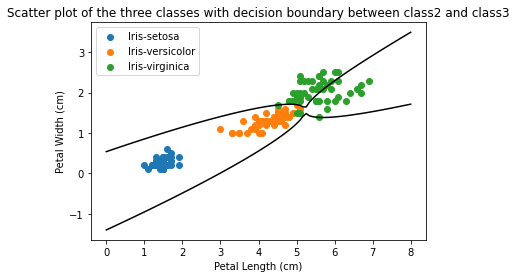

In [660]:
# plotting the decision boundary after solving the discriminant function g2(x) = g3(x)
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'], label='Iris-setosa')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], label='Iris-versicolor')
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], label='Iris-virginica')

# plotting the decision boundary
x = np.linspace(0, 8, 100)
y = 0.379348898379015*x - 0.969021830332695*np.sqrt(abs((-0.0140965221198476*x**2 - 0.117692978621301*x + 1))) - 0.429432728163691, 0.379348898379015*x + 0.969021830332695*np.sqrt(abs(-0.0140965221198476*x**2 - 0.117692978621301*x + 1)) - 0.429432728163691
plt.plot(x, y[0], color='black')
plt.plot(x, y[1], color='black')

# set the title and labels of the plot
plt.title('Scatter plot of the three classes with decision boundary between class2 and class3')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

plt.show()

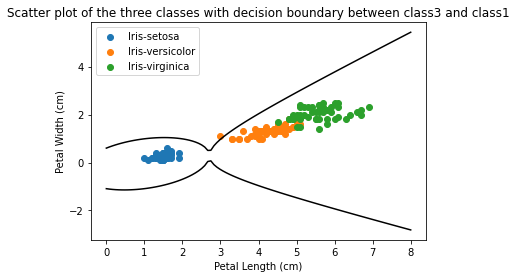

In [661]:
# plotting the decision boundary after solving the discriminant function g1(x) = g3(x)
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'], label='Iris-setosa')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], label='Iris-versicolor')
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], label='Iris-virginica')

# plotting the decision boundary
x = np.linspace(0, 8, 100)
y = 0.194537614676535*x - 0.856743491745518*np.sqrt(abs(-0.501846727754526*x**2 + x + 0.974471851098734)) - 0.245996507131731, 0.194537614676535*x + 0.856743491745518*np.sqrt(abs(-0.501846727754526*x**2 + x + 0.974471851098734)) - 0.245996507131731
plt.plot(x, y[0], color='black')
plt.plot(x, y[1], color='black')

# set the title and labels of the plot
plt.title('Scatter plot of the three classes with decision boundary between class3 and class1')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

plt.show()

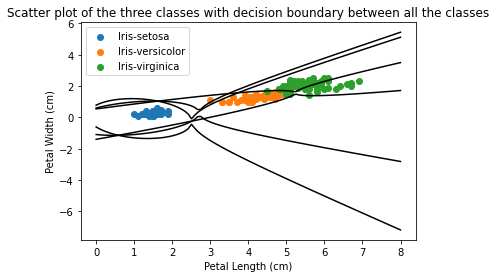

In [662]:
# plot all the 3 decision boundaries together in one plot

plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'], label='Iris-setosa')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], label='Iris-versicolor')
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], label='Iris-virginica')

# plotting the decision boundary
x = np.linspace(0, 8, 100)
y = -0.139653762724135*x - 1.38449873376855*np.sqrt(abs(-0.436697803198121*x**2 + x + 0.251234530609431)) + 0.0857083657727485, -0.139653762724135*x + 1.38449873376855*np.sqrt(abs(-0.436697803198121*x**2 + x + 0.251234530609431)) + 0.0857083657727485
plt.plot(x, y[0], color='black')
plt.plot(x, y[1], color='black')

x = np.linspace(0, 8, 100)
y = 0.379348898379015*x - 0.969021830332695*np.sqrt(abs((-0.0140965221198476*x**2 - 0.117692978621301*x + 1))) - 0.429432728163691, 0.379348898379015*x + 0.969021830332695*np.sqrt(abs(-0.0140965221198476*x**2 - 0.117692978621301*x + 1)) - 0.429432728163691
plt.plot(x, y[0], color='black')
plt.plot(x, y[1], color='black')

x = np.linspace(0, 8, 100)
y = 0.194537614676535*x - 0.856743491745518*np.sqrt(abs(-0.501846727754526*x**2 + x + 0.974471851098734)) - 0.245996507131731, 0.194537614676535*x + 0.856743491745518*np.sqrt(abs(-0.501846727754526*x**2 + x + 0.974471851098734)) - 0.245996507131731
plt.plot(x, y[0], color='black')
plt.plot(x, y[1], color='black')

# set the title and labels of the plot
plt.title('Scatter plot of the three classes with decision boundary between all the classes')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

plt.show()

**Q6. Consider the 128- dimensional feature vectors given in the “face feature vectors.csv” file. Use the following information to design and implement a Bayes Classifier.**

Dataset Specifications: \
Total number of samples = 800 \
Number of classes = 2 ( labelled as “male” and “female”) \
Samples from “1 to 400” belongs to class “male” \
Samples from “401 to 800” belongs to class “female” \
Number of samples per class = 400 

Use the following information to design classifier: \
Number of test samples ( first 5 in each class) = 5 \
Number of training samples ( remaining 395 in each class) = 395 \
Number of dimensions = 128

In [663]:
# reading the csv file containing the face feature vectors
df_128 = pd.read_csv("./face feature vectors.csv")

# displaying the first 5 rows of the data
df_128.head()

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,3,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,4,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,5,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135


In [664]:
# drop the first column
df_128.drop(df_128.columns[0], axis=1, inplace=True)

# get the labels of the data
labels = df_128.iloc[:, 0].unique()

df_128


,Unnamed: 1,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
796,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
797,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
798,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [665]:
labels

array(['male', 'female'], dtype=object)

In [666]:
# rename the 1st Unnamed column to Class
df_128.rename(columns={'Unnamed: 1': 'Class'}, inplace=True)

# encode the class labels
df_128['Label'] = df_128['Class'].map({'male': 0, 'female': 1})

df_128

,Class,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,Label
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567,0
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930,0
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116,0
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462,0
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,...,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384,1
796,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,...,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970,1
797,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,...,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977,1
798,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,...,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071,1


In [667]:
# train test split of the data
# 5 of each class for testing and 395 taken for training

train = pd.concat([df_128[df_128['Class'] == 'male'].iloc[5:, :], df_128[df_128['Class'] == 'female'].iloc[5:, :]])
train.reset_index(drop=True, inplace=True)

test = pd.concat ([df_128[df_128['Class'] == 'male'].iloc[:5, :], df_128[df_128['Class'] == 'female'].iloc[:5, :]])
test.reset_index(drop=True, inplace=True)

# display the train and test data head side by side using ipython display
from IPython.display import display

display(train.head())
display(test.head())


,Class,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,Label
0,male,-0.149119,0.125288,0.142323,-0.009087,-0.031394,-0.123533,0.043598,-0.063999,0.162439,...,0.089529,-0.034872,0.057080,-0.137162,-0.072522,0.052731,-0.141460,0.019018,0.085765,0
1,male,-0.139035,0.073513,-0.001770,-0.034225,-0.101610,0.065105,-0.014420,-0.054993,0.134674,...,-0.002164,0.060377,0.080294,-0.139369,-0.150245,0.078657,0.024194,0.062180,0.036039,0
2,male,-0.074126,-0.000669,0.004166,-0.082413,-0.096091,-0.021992,0.009714,-0.056961,0.174237,...,0.038932,0.023520,-0.090260,-0.147692,-0.008296,0.007609,-0.026687,-0.017523,-0.038310,0
3,male,-0.166220,0.042769,-0.031647,-0.036892,-0.143837,-0.040566,0.042541,-0.122923,0.188971,...,-0.049135,0.081770,-0.027199,-0.096941,-0.094661,0.057797,-0.101063,0.061373,0.062176,0
4,male,-0.185770,0.154008,0.073184,-0.070829,-0.144617,-0.019732,-0.019418,-0.004675,0.152325,...,0.035101,-0.147997,-0.046010,-0.087777,-0.100660,0.036190,0.012158,0.032304,0.085996,0


,Class,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,Label
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567,0
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930,0
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116,0
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462,0
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135,0


In [668]:
# splitting the data into features and labels in df
X_train = train.iloc[:, 1:129]
y_train = train.iloc[:, 129]

X_test = test.iloc[:, 1:129]
y_test = test.iloc[:, 129]

# display the x_train and x_test data head side by side using ipython display

display(X_train.head())

display(X_test.head())

# display the y_train and y_test data head side by side using ipython display

display(y_train.head())

display(y_test.head())

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.149119,0.125288,0.142323,-0.009087,-0.031394,-0.123533,0.043598,-0.063999,0.162439,-0.086513,...,0.060833,0.089529,-0.034872,0.057080,-0.137162,-0.072522,0.052731,-0.141460,0.019018,0.085765
1,-0.139035,0.073513,-0.001770,-0.034225,-0.101610,0.065105,-0.014420,-0.054993,0.134674,-0.058293,...,0.081007,-0.002164,0.060377,0.080294,-0.139369,-0.150245,0.078657,0.024194,0.062180,0.036039
2,-0.074126,-0.000669,0.004166,-0.082413,-0.096091,-0.021992,0.009714,-0.056961,0.174237,-0.056700,...,0.050497,0.038932,0.023520,-0.090260,-0.147692,-0.008296,0.007609,-0.026687,-0.017523,-0.038310
3,-0.166220,0.042769,-0.031647,-0.036892,-0.143837,-0.040566,0.042541,-0.122923,0.188971,-0.036112,...,0.014732,-0.049135,0.081770,-0.027199,-0.096941,-0.094661,0.057797,-0.101063,0.061373,0.062176
4,-0.185770,0.154008,0.073184,-0.070829,-0.144617,-0.019732,-0.019418,-0.004675,0.152325,0.017508,...,0.093317,0.035101,-0.147997,-0.046010,-0.087777,-0.100660,0.036190,0.012158,0.032304,0.085996


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,-0.044872,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,-0.044821,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,-0.052085,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,-0.056267,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,-0.011889,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135


0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [669]:
# combining the train data and splitting it into 2 classes
df_train = pd.concat([X_train, y_train], axis=1)
df_train0 = df_train[df_train['Label'] == 0]
df_train1 = df_train[df_train['Label'] == 1]

In [670]:
# calculating the apriori probabilities of the classes
p0 = df_train0.shape[0] / df_train.shape[0]
p1 = df_train1.shape[0] / df_train.shape[0]

# printing the apriori probabilities
print("Apriori probability of class 0: ", p0)
print("Apriori probability of class 1: ", p1)


Apriori probability of class 0:  0.5
Apriori probability of class 1:  0.5


In [671]:
# calculating the mean of the two classes
mean0 = np.mean(df_train0.iloc[:, :128], axis=0)
mean1 = np.mean(df_train1.iloc[:, :128], axis=0)

# print the mean of the two classes
print("Mean of the 1st class: \n", mean0)
print("Mean of the 2nd class: \n", mean1)


Mean of the 1st class: 
 0     -0.091268
1      0.092663
2      0.043765
3     -0.030270
4     -0.093455
         ...   
123   -0.118024
124    0.022343
125   -0.024776
126    0.019414
127    0.039645
Length: 128, dtype: float64
Mean of the 2nd class: 
 0     -0.117703
1      0.076545
2      0.081977
3     -0.077487
4     -0.122954
         ...   
123   -0.087131
124    0.053732
125   -0.031716
126    0.003645
127    0.026455
Length: 128, dtype: float64


In [672]:
# calculating the covariance matrix of the two classes
cov0 = np.cov(df_train0.iloc[:, :128].T)
cov1 = np.cov(df_train1.iloc[:, :128].T)

# print the covariance matrix of the two classes
print("Covariance matrix of the 1st class: \n", cov0)
print("Covariance matrix of the 2nd class: \n", cov1)


Covariance matrix of the 1st class: 
 [[ 3.16328105e-03 -5.73157407e-04 -2.97682846e-04 ...  6.51347798e-04
  -2.27358422e-04 -9.89172734e-05]
 [-5.73157407e-04  2.26105296e-03  3.65259665e-04 ... -3.45937850e-04
  -2.92078249e-04 -2.04208450e-04]
 [-2.97682846e-04  3.65259665e-04  2.53021267e-03 ... -3.45438227e-04
   9.79811329e-05 -8.84490101e-05]
 ...
 [ 6.51347798e-04 -3.45937850e-04 -3.45438227e-04 ...  2.45628403e-03
   6.15939584e-05 -4.22971785e-05]
 [-2.27358422e-04 -2.92078249e-04  9.79811329e-05 ...  6.15939584e-05
   2.40397561e-03  2.63357714e-04]
 [-9.89172734e-05 -2.04208450e-04 -8.84490101e-05 ... -4.22971785e-05
   2.63357714e-04  1.75921775e-03]]
Covariance matrix of the 2nd class: 
 [[ 2.43711101e-03 -3.95885633e-04  3.67424485e-04 ...  1.36032497e-04
  -2.26478736e-04 -1.67995298e-04]
 [-3.95885633e-04  2.56543670e-03  4.68945752e-05 ... -4.80147458e-04
  -1.33853743e-04  5.71641092e-05]
 [ 3.67424485e-04  4.68945752e-05  1.93964903e-03 ... -1.36830421e-04
  -1.933

In [673]:
# calculating the inverse of the covariance matrix of the two classes
inv_cov0 = np.linalg.inv(cov0)
inv_cov1 = np.linalg.inv(cov1)

# print the inverse of the covariance matrix of the two classes
print("Inverse of the Covariance matrix of the 1st class: \n", inv_cov0)
print("Inverse of the Covariance matrix of the 2nd class: \n", inv_cov1)

Inverse of the Covariance matrix of the 1st class: 
 [[ 6.38312582e+13  2.55600004e+12  1.65621219e+13 ...  2.24536242e+12
  -1.34772312e+13  3.53760356e+13]
 [ 2.55523666e+12  1.00123517e+14 -8.16590753e+12 ...  6.62780052e+12
   1.65442670e+13  3.03489936e+12]
 [ 1.65644524e+13 -8.15897672e+12  6.30256619e+13 ... -1.05628841e+13
  -1.26796742e+13 -1.76442042e+13]
 ...
 [ 2.24276204e+12  6.62768935e+12 -1.05564451e+13 ...  8.39512902e+13
   1.44309295e+13 -8.16369429e+12]
 [-1.34816464e+13  1.65348204e+13 -1.26779270e+13 ...  1.44249841e+13
   1.21165888e+14 -2.31979801e+12]
 [ 3.53739203e+13  3.02250404e+12 -1.76440200e+13 ... -8.15234530e+12
  -2.30286561e+12  1.21203896e+14]]
Inverse of the Covariance matrix of the 2nd class: 
 [[ 7.58411030e+13 -4.94308110e+12  1.95747641e+13 ...  1.16205221e+12
  -2.88057673e+13  3.94048080e+13]
 [-4.94356665e+12  7.59817058e+13 -1.73579253e+13 ...  7.47377027e+12
   1.27213534e+13  3.09055598e+11]
 [ 1.95762528e+13 -1.73540562e+13  6.96212508e+1

In [674]:
# We first calculate the constant part of the probability density function

const1 = 1 / (np.sqrt(np.linalg.det(cov0)) * ((2 * np.pi) ** 64))

const2 = 1 / (np.sqrt(np.linalg.det(cov1)) * ((2 * np.pi) ** 64))

# print the constant part of the probability density function
print("Constant part of the probability density function of the 1st class: \n", const1)
print("Constant part of the probability density function of the 2nd class: \n", const2)

# print the determinant of the covariance matrix of the two classes
print("Determinant of the Covariance matrix of the 1st class: \n", np.linalg.det(cov0))
print("Determinant of the Covariance matrix of the 2nd class: \n", np.linalg.det(cov1))

Constant part of the probability density function of the 1st class: 
 inf
Constant part of the probability density function of the 2nd class: 
 inf
Determinant of the Covariance matrix of the 1st class: 
 0.0
Determinant of the Covariance matrix of the 2nd class: 
 0.0


C:\Users\Avinash\AppData\Local\Temp\ipykernel_11964\4037449651.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  const1 = 1 / (np.sqrt(np.linalg.det(cov0)) * ((2 * np.pi) ** 64))
C:\Users\Avinash\AppData\Local\Temp\ipykernel_11964\4037449651.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  const2 = 1 / (np.sqrt(np.linalg.det(cov1)) * ((2 * np.pi) ** 64))


As we can see that determinant of covariance matrix is nearly zero but not zero (as inverse is possible) and as it is constant. We can ignore the constant term and calculate the probabilities based on the exponential term.

In [675]:
# Now, we calculate the posterior probabilities for each class for each data point in the test set

# creating a list to store the posterior probabilities
posterior = []

# list to store the predicted class
pred = []

# looping through each data point in the test set
for i in range(X_test.shape[0]): 
        # calculating the exponential part of the probability density function
        exp1 = np.exp(-0.5 * np.dot(np.dot((X_test.iloc[i, :128] - mean0).T, inv_cov0), (X_test.iloc[i, :128] - mean0)))
        exp2 = np.exp(-0.5 * np.dot(np.dot((X_test.iloc[i, :128] - mean1).T, inv_cov1), (X_test.iloc[i, :128] - mean1)))
        
        # calculating the posterior probabilities
        post0 = exp1 * p0
        post1 = exp2 * p1
        
        # appending the posterior probabilities to the list
        posterior.append([post0, post1])
        
        # appending the predicted class to the list
        pred.append(np.argmax([post0, post1]))

# converting the class values to class labels
pred_names = [labels[i] for i in pred]

pred_names

['male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female']

In [676]:
# calculating the accuracy of the model for the test set on the basis of the predicted class labels
acc = np.sum(pred == y_test) / y_test.shape[0]

# printing the accuracy of the model
print("Accuracy of the model: ", acc*100, "%")

Accuracy of the model:  90.0 %
